In [1]:
sepal_length: float = 6
sepal_width: float = 3.5
petal_length: float = 4
petal_width: float = 1.5

In [2]:
import matplotlib.pyplot as plt
import pickle
from sklearn import datasets

with open("iris_model.pkl", "rb") as f:
    iris_model = pickle.load(f)
    
iris = datasets.load_iris()

slengths = [
    iris.data[:, 0][iris.target==0],
    iris.data[:, 0][iris.target==1],
    iris.data[:, 0][iris.target==2]
]
swidths = [
    iris.data[:, 1][iris.target==0],
    iris.data[:, 1][iris.target==1],
    iris.data[:, 1][iris.target==2]
]
plengths = [
    iris.data[:, 2][iris.target==0],
    iris.data[:, 2][iris.target==1],
    iris.data[:, 2][iris.target==2]
]
pwidths = [
    iris.data[:, 3][iris.target==0],
    iris.data[:, 3][iris.target==1],
    iris.data[:, 3][iris.target==2]
]


colors = plt.cm.Set1.colors

In [3]:
def predict(sepal_length, sepal_width, petal_length, petal_width):
    
    prediction_name = {i: iris.target_names[i] for i in range(3)}
    
    raw_prediction = iris_model.predict([[
        sepal_length,
        sepal_width,
        petal_length,
        petal_width
    ]])[0]
    return prediction_name[raw_prediction]

In [4]:
print("Predicted flower type:")
print("\t", predict(sepal_length, sepal_width, petal_length, petal_width))

Predicted flower type:
	 versicolor


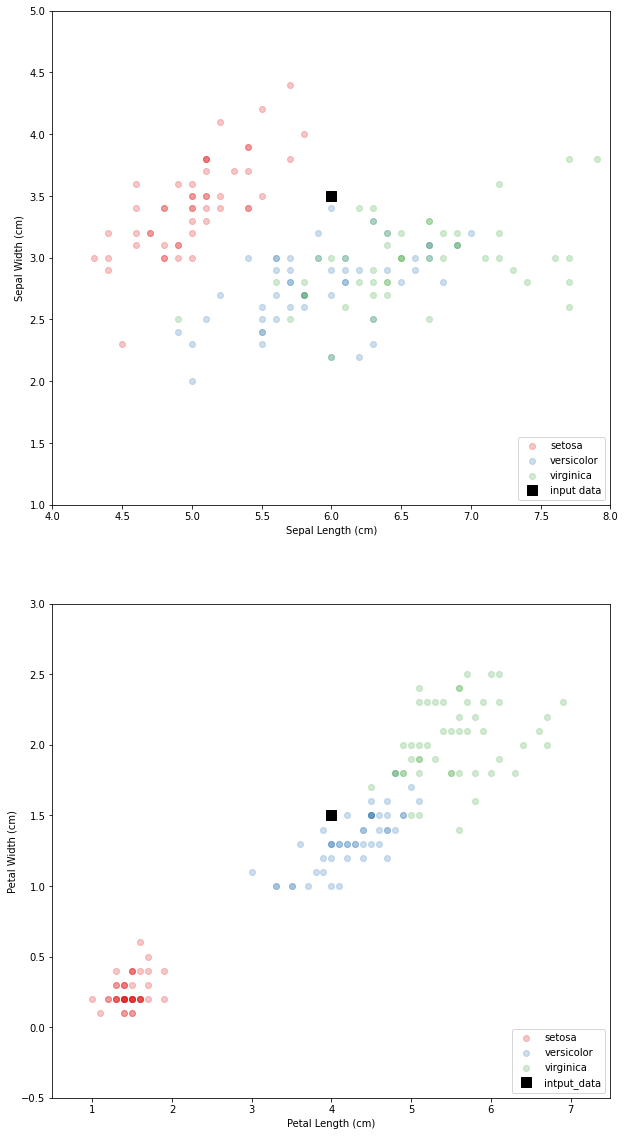

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))


ax[0].set_xlabel("Sepal Length (cm)")
ax[0].set_ylabel("Sepal Width (cm)")
ax[0].set_xlim(4, 8)
ax[0].set_ylim(1, 5)

for i in range(3):
    ax[0].scatter(slengths[i],
                  swidths[i],
                  color=colors[i],
                  label=iris.target_names[i],
                  alpha=0.25)

ax[0].plot(sepal_length, sepal_width, "sk", markersize=10, label="input data")
ax[0].legend(loc="lower right")


ax[1].set_xlabel("Petal Length (cm)")
ax[1].set_ylabel("Petal Width (cm)")
ax[1].set_xlim(0.5, 7.5)
ax[1].set_ylim(-0.5, 3)
for i in range(3):
    ax[1].scatter(plengths[i],
                  pwidths[i],
                  color=colors[i],
                  label=iris.target_names[i],
                  alpha=0.25)
ax[1].plot(petal_length, petal_width, "sk", markersize=10, label="intput_data")
ax[1].legend(loc="lower right")

plt.show()